<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Nadia !

Perkenalkan saya Dipta, disini saya akan mereview tugas Nadia ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Nadia dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, sebelum mengerjakan memang sebaiknya dijelaskan dulu terkait deskripsi dari project yang akan dikerjakan!

</div>


## Pra-pemrosesan

In [1]:
# memuat library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Memuat Data

In [2]:
# memuat file data menjadi DataFrame
path = '/datasets/vehicles_us.csv'
df = pd.read_csv(path)

In [3]:
# menampilkan data
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Mengeksplorasi Data Awal

*Dataset* berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan 
- `transmission`
- `type`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [4]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# menampilkan sampel data
df.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
29253,24995,2016.0,gmc sierra 1500,excellent,8.0,gas,56000.0,automatic,truck,black,1.0,2018-05-16,91
29798,2695,2008.0,chevrolet impala,good,6.0,gas,174898.0,automatic,sedan,brown,NaN,2018-06-26,14
25628,4500,2007.0,chevrolet equinox,good,6.0,gas,149000.0,automatic,SUV,white,NaN,2018-09-27,31
30613,14500,2011.0,ford f-250 sd,good,8.0,gas,185843.0,automatic,truck,black,1.0,2018-12-13,39
35316,17800,NaN,jeep wrangler unlimited,excellent,6.0,gas,129315.0,automatic,SUV,black,1.0,2018-05-19,22
7293,4500,2007.0,honda civic,good,4.0,gas,157000.0,automatic,sedan,white,NaN,2018-08-17,61
22684,3950,2010.0,ford explorer,excellent,6.0,gas,235689.0,automatic,wagon,grey,1.0,2018-09-30,36
40569,44913,NaN,chevrolet corvette,excellent,8.0,gas,13341.0,manual,coupe,blue,NaN,2018-11-01,48
15622,2500,2002.0,chevrolet impala,good,6.0,gas,130000.0,automatic,sedan,red,NaN,2019-03-14,24
45163,13250,2015.0,toyota camry,excellent,4.0,gas,56229.0,automatic,sedan,grey,NaN,2018-06-27,91


Sejauh ini, ditemukan beberapa masalah:
1. adanya mising value pada data,
2. terdapat beberapa kolom dengan tipe data yang tidak sesuai

Untuk memperbaiki dan mengetahui adanya kendala lain, diperlukan penyelidikan dan perubahan lebih lanjut.

In [6]:
# pengecekan missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
# menghitung persentase missing values tiap kolom
round(df.isna().sum() / len(df) * 100, 2)

price            0.00
model_year       7.02
model            0.00
condition        0.00
cylinders       10.21
fuel             0.00
odometer        15.32
transmission     0.00
type             0.00
paint_color     17.99
is_4wd          50.37
date_posted      0.00
days_listed      0.00
dtype: float64

Terdatap missing values di beberapa kolom, yaitu:
- `model_year` sejumlah 3619 (7.02%)
- `cylinders` sejumlah 5260 (10,21%)
- `odometer` sejumlah 7892 (15,32%)
- `paint_color` sejumlah 9267 (17,99%)
- `is_4wd` sejumlah 25953 (50,37%)

Pada kolom `is_4wd`, persentase missing value bahkan melebihi setengah dari jumlah data.

In [8]:
# pengecekan tipe data kolom
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Terdapat beberapa kolom dengan tipe data yang tidak sesuai, yaitu:
- kolom `date_posted` bertipe datakan object (string), sedangkan datanya berupa tanggal

Memeriksa apakah terdapat keanehan lain pada data

In [9]:
# memeriksa baris duplikat
df.duplicated().sum()

0

### Kesimpulan dan Langkah-Langkah Selanjutnya

[Rumuskan kesimpulan Anda tentang data awal. Menurut Anda apa yang terlihat normal dan apa yang tidak?]
[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini. Khususnya, Anda harus menyatakan dengan jelas bagian data mana yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan.]

Setelah dilakukan eksplorasi data, ditemukan adanya ketidak normalan pada data berupa adanya nilai yang hilang dan tipe data yang tidak sesuai dengan makna dari nilainya. Bahkan salah satu kolom (`is_4wd`) memiliki persentase missing value yang melebihi 50% data. Untuk kelancaran proses pengolahan data, perlu dilakukan perbaikan pada data yaitu:
1. dilakukan pengisian pada kolom dengan nilai yang hilang
2. dilakukan (penyesuaian) penggantian tipe data

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Section 2.1 sudah sesuai yah!

</div>


## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Mempelajari nilai yang hilang untuk setiap kolom secara lebih detail dan memutuskan apa yang harus dilakukan dengan nilai tersebut berdasarkan hipotesis

In [10]:
# pengecekan missing value pada kolom `is_4wd`
df['is_4wd'].isna().sum()

25953

In [11]:
# melihat unique values pada kolom `is_4wd`
df['is_4wd'].unique()

array([ 1., nan])

In [12]:
# mengisi nilai hilang dengan 2
df.loc[df['is_4wd'].isna(), 'is_4wd'] = 0

In [13]:
# melakukan pengecekan pada nilai di kolom `is_4wd`
df['is_4wd'].unique()

array([1., 0.])

In [14]:
# melakukatn pengecekan terhadap perubahan missing value di kolom `is_4wd`
df['is_4wd'].isna().sum()

0

Pada deskripsi data, kolom `is_4wd` bertipe datakan boolean. Dilihat dari unique dari kolom tersebut, kemungkinan besar data yang hilang pada terjadi karena kesalahan sistem saat memasukkan nilai `0` (nilai tidak pada boolean). Maka dari itu, nilai yang hilang di kolom `is_4wd` diisi dengan nilai `0`

In [15]:
# pengecekan missing value pada kolom `paint_color`
df['paint_color'].isna().sum()

9267

In [16]:
# melihat deskripsi kolom `paint_color`
df['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [17]:
# mengisi nilai yang hilang dengan modus dari `paint_color` 
df.loc[df['paint_color'].isna(), 'paint_color'] = 'others'

In [18]:
# melakukan pengecekan pada nilai di kolom `paint_color`
df['paint_color'].value_counts()

white     10029
others     9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [19]:
# melakukatn pengecekan terhadap perubahan missing value di kolom `paint_color`
df['paint_color'].isna().sum()

0

Kolom `paint_color` bertipe data nominal. Maka dari itu, nilai yang hilang dapat diganti dengan `others`

In [20]:
# pengecekan missing value pada kolom`cylinders`
df['cylinders'].isna().sum()

5260

In [21]:
# melihat deskripsi kolom `cylinders`
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [22]:
# mengisi nilai kosong dengan mean dari `cylinders`
df.loc[df['cylinders'].isna(), 'cylinders'] = 'others'

In [23]:
# melihat perubahan nilai melalui deskripsi kolom `cylinders`
df['cylinders'].describe()

count     51525.0
unique        8.0
top           8.0
freq      15844.0
Name: cylinders, dtype: float64

In [24]:
# melakukatn pengecekan terhadap perubahan missing value di kolom `cylinders`
df['cylinders'].isna().sum()

0

Berdasarkan makna dari data, kolom `cylinders` merupakan data kategorik (nominal). Maka dari itu, nilai yang hilang dapat digantikan dengan `others`

In [25]:
# pengecekan missing value pada kolom`odometer`
df['odometer'].isna().sum()

7892

In [26]:
# melihat deskripsi dari kolom `odometer`
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [27]:
# mengganti nilai kosong dengan median
df.loc[df['odometer'].isna(), 'odometer'] = df['odometer'].median()

In [28]:
# melakukatn pengecekan terhadap perubahan missing value di kolom `odometer`
df['odometer'].isna().sum()

0

Pada deskripsi data, kolom `odometer` memiliki tipe data ratio. Karena kita masih belum mengetahui apakah terdapat outlier atau tidak pada data, lebih aman untukmengganti nilai yang hilang dengan meadian dari kolom `odometer`.

In [29]:
# pengecekan missing value pada kolom`model_year`
df['model_year'].isna().sum()

3619

In [30]:
# melihat deskripsi dari kolom `model_year`
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [31]:
# mengubah nilai kosong pada kolom `model_year` menjadi modusnya
df.loc[df['model_year'].isna(), 'model_year'] = df['model_year'].mode()[0]

In [32]:
# melakukatn pengecekan terhadap perubahan missing value di kolom `model_year`
df['model_year'].isna().sum()

0

Meskipun kolom `model_year` bertipe data float, namun tipe data statistiknya adalah nominal. Maka dari itu, pengisian nilai yang hilang dilakukan menggunakan nilai modus

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.2 sudah sesuai yah! cuman ada saran dari aku
- Missing values untuk tipe data kategorik seperti paint_color ataupun cylinders lebih baik diisi dengan 'others' daripada modus. But its okay ya ini hanya saran aja.

</div>


## Memperbaiki Tipe Data

In [33]:
# melakukan pengecekan pada tipe data `date_posted`
df['date_posted'].describe()

count          51525
unique           354
top       2019-03-17
freq             186
Name: date_posted, dtype: object

In [34]:
# merubah string menjadi datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [35]:
# melakukan pengecekan pada perubahan tipe data
df['date_posted'].sample(10)

47873   2019-01-13
43822   2018-12-14
20319   2018-09-12
4776    2018-10-27
29567   2019-01-15
19679   2018-08-22
35774   2018-10-31
14331   2019-01-20
4455    2018-12-17
24530   2019-02-02
Name: date_posted, dtype: datetime64[ns]

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.3 sudah sesuai yah!
</div>

## Memperbaiki Kualitas Data

Menambahkan beberapa kolom pada data agar lebih mudah dianalisis

In [36]:
# menambahkan ke kolom baru nilai tanggal pada saat iklan terakhir ditayangkan 
df['date_last_posted'] = df['date_posted'] + pd.to_timedelta(df['days_listed'], unit='D')
df['date_last_posted']

0       2018-07-12
1       2018-12-08
2       2019-04-27
3       2019-03-31
4       2019-04-30
           ...    
51520   2018-11-09
51521   2018-12-06
51522   2018-12-17
51523   2018-09-11
51524   2018-06-15
Name: date_last_posted, Length: 51525, dtype: datetime64[ns]

In [37]:
# menambahkan ke kolom baru lama iklan tayang dalam minggu
df['weeks_posted'] = df['date_posted'].dt.isocalendar().week
df['weeks_posted']

0        25
1        42
2         6
3        12
4        14
         ..
51520    40
51521    46
51522    46
51523    27
51524    23
Name: weeks_posted, Length: 51525, dtype: UInt32

In [38]:
# menambahkan ke kolom baru lama iklan tayang dalam bulan
df['months_posted'] =  df['date_posted'].dt.month
df['months_posted']

0         6
1        10
2         2
3         3
4         4
         ..
51520    10
51521    11
51522    11
51523     7
51524     6
Name: months_posted, Length: 51525, dtype: int64

In [39]:
# menambahkan ke kolom baru lama iklan tayang dalam tahun
df['years_posted'] = df['date_posted'].dt.year
df['years_posted']

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: years_posted, Length: 51525, dtype: int64

In [40]:
# # menambahkan ke kolom baru usia kendaraan saat iklan ditayangkan
df['age'] = df['date_posted'].dt.year - df['model_year']
df['age']

0         7.0
1         5.0
2         6.0
3        16.0
4         2.0
         ... 
51520     5.0
51521    16.0
51522     9.0
51523     5.0
51524     4.0
Name: age, Length: 51525, dtype: float64

In [41]:
# menambahkan ke kolom baru jarak tempuh rata-rata kendaraan per tahun
df['average_odometer'] = df['odometer'] / df['age']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19,2018-07-12,25,6,2018,7.0,20714.285714
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018-12-08,42,10,2018,5.0,17741.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019-04-27,6,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9,2019-03-31,12,3,2019,16.0,7062.500000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019-04-30,14,4,2019,2.0,40451.500000


In [42]:
# membuat fungsi untuk kolom 'condition' agar proses dimanipulasi data lebih mudah
def category_condition(val):
    if val=='new':
        return 5
    elif val=='like new':
        return 4
    elif val=='excellent':
        return 3
    elif val=='good':
        return 2
    elif val=='fair':
        return 1
    elif val=='salvage':
        return 0

In [43]:
# mengganti nilai pada kolom 'condition' agar proses dimanipulasi data lebih mudah
df['condition_number'] = df['condition'].apply(category_condition)
df['condition_number']

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition_number, Length: 51525, dtype: int64

In [44]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer,condition_number
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19,2018-07-12,25,6,2018,7.0,20714.285714,2
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018-12-08,42,10,2018,5.0,17741.000000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019-04-27,6,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9,2019-03-31,12,3,2019,16.0,7062.500000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019-04-30,14,4,2019,2.0,40451.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018-11-09,40,10,2018,5.0,17627.200000,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018-12-06,46,11,2018,16.0,11343.750000,0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018-12-17,46,11,2018,9.0,14222.222222,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018-09-11,27,7,2018,5.0,27914.600000,2


<div class="alert alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.4 ada yang kurang ya yaitu membuat kolom untuk Day of the week, month, and year the ad was placed!

</div>

## Memeriksa Data yang Sudah Bersih

In [45]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  object        
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_last_posted  51525 non-null  datetime64[ns]
 14  weeks_posted      5152

In [46]:
# menampilkan sampel data
df.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer,condition_number
17457,38995,2016.0,ford f-250 sd,good,8.0,gas,40698.0,automatic,truck,grey,1.0,2019-01-02,57,2019-02-28,1,1,2019,3.0,13566.000000,2
47560,29000,2015.0,toyota tacoma,excellent,4.0,gas,128900.0,automatic,truck,grey,1.0,2018-06-26,53,2018-08-18,26,6,2018,3.0,42966.666667,3
21877,9000,2009.0,ford f150,good,8.0,gas,245220.0,automatic,pickup,white,1.0,2019-02-08,11,2019-02-19,6,2,2019,10.0,24522.000000,2
43938,27999,2014.0,gmc sierra 1500,like new,others,gas,52000.0,automatic,truck,white,1.0,2018-05-11,72,2018-07-22,19,5,2018,4.0,13000.000000,4
33165,6495,2012.0,toyota prius,excellent,4.0,hybrid,112000.0,automatic,hatchback,others,0.0,2019-04-09,56,2019-06-04,15,4,2019,7.0,16000.000000,3
27706,8795,2012.0,subaru outback,good,4.0,gas,105626.0,automatic,wagon,grey,1.0,2018-06-15,47,2018-08-01,24,6,2018,6.0,17604.333333,2
10253,8995,2009.0,chevrolet tahoe,good,8.0,gas,178407.0,automatic,SUV,silver,1.0,2018-05-27,55,2018-07-21,21,5,2018,9.0,19823.000000,2
47589,2900,2005.0,jeep liberty,good,6.0,gas,113000.0,automatic,SUV,others,1.0,2018-12-26,17,2019-01-12,52,12,2018,13.0,8692.307692,2
26009,26665,2013.0,jeep wrangler,excellent,6.0,gas,43678.0,automatic,SUV,white,1.0,2018-06-23,28,2018-07-21,25,6,2018,5.0,8735.600000,3
35366,17026,2013.0,toyota highlander,excellent,6.0,gas,149189.0,automatic,SUV,white,1.0,2019-02-27,4,2019-03-03,9,2,2019,6.0,24864.833333,3


Setelah dilakukan proses cleansing, data siap diolah

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.5 sudah sesuai yah!

</div>

## Mempelajari Parameter Inti

Parameternya adalah
- Harga (`price`)
- Usia kendaraan ketika iklan ditayangkan (`age)
- Jarak tempuh (`odometer`)
- Jumlah silinder (`cylinders`)
- Kondisi (`condition`)

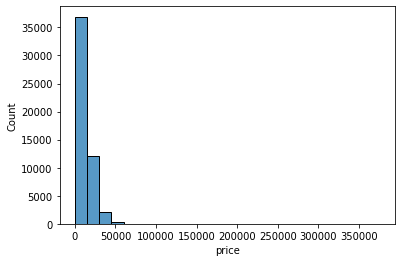

In [47]:
# menampilkan histogram 'price'
sns.histplot(data=df, x='price', bins=25)
plt.show()

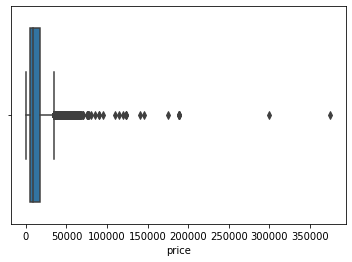

In [48]:
# menampilkan boxplot kolom 'price'
sns.boxplot(data=df, x='price')
plt.show()

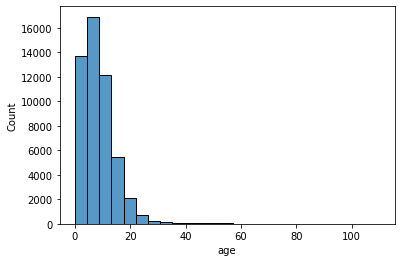

In [49]:
# menampilkan histogram data 'age'
sns.histplot(data=df, x='age', bins=25)
plt.show()

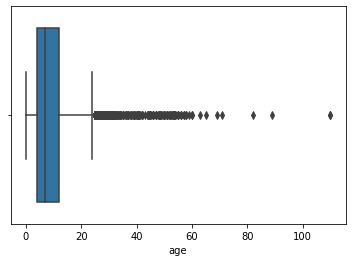

In [50]:
# menampilkan boxplot kolom 'age'
sns.boxplot(data=df, x='age')
plt.show()

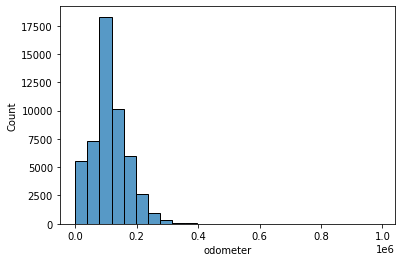

In [51]:
# menampilkan histogram data 'odometer' 
sns.histplot(data=df, x='odometer', bins=25)
plt.show()

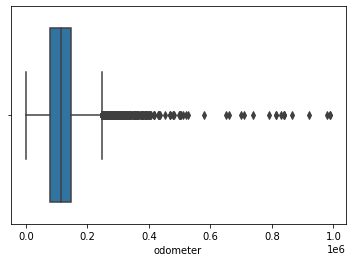

In [52]:
# menampilkan boxplot kolom  'odometer'
sns.boxplot(data=df, x='odometer')
plt.show()

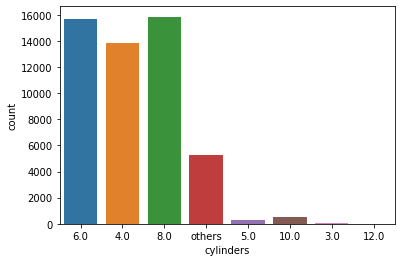

In [53]:
# memvisualisasikan data 'cylinders' 
sns.countplot(data=df, x='cylinders')
plt.show()

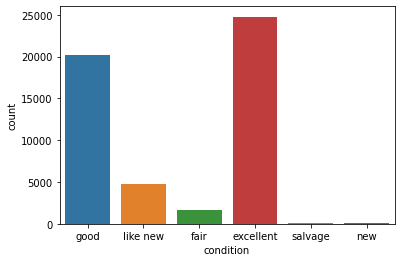

In [54]:
# memvisualisasikan data 'condition'
sns.countplot(data=df, x='condition')
plt.show()

Setelah melakukan visualisasi data parameter inti dengan boxplot dan bar chart diketahui bahwa parameter harga, usia kendaraan ketika iklan ditayangkan, dan jarak tempuh memiliki penyebaran data yang tidak merata dan sulit dibaca karena diindikasikan terdapat outlier. Pendapat tersebut didukung oleh visualisasi dari boxplot dari parameter tersebut. 

Sebaliknya, parameter jumlah silinder dan kondisi tidak memiliki outlier, terlebih kolom tersebut termasuk data kategorik.

Perlu dilakukan penentuan penentuan nilai normal untuk mengatasinya.

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.6 sudah sesuai yah! sudah bisa menentukan outlier juga!

</div>

## Mempelajari dan Menangani Outlier

In [55]:
# menentukan batas bawah outlier
def lower_whisker(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    iqr = q3-q1
    
    return  q1 - 1.5 * iqr

In [56]:
# menentukan batas atas outlier 
def upper_whisker(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    iqr = q3-q1
    
    return  q1 + 1.5 * iqr

In [57]:
# batas bawah kolom 'price'
lower_price = lower_whisker(df, 'price')
lower_price

-12758.5

In [58]:
# batas bawah kolom 'age'
lower_age = lower_whisker(df, 'age')
lower_age

-8.0

In [59]:
# batas bawah kolom 'odometer'
lower_odometer = lower_whisker(df, 'odometer')
lower_odometer

-21859.0

In [60]:
# batas atas kolom 'price'
upper_price = upper_whisker(df, 'price')
upper_price

22758.5

In [61]:
# batas atas kolom 'age'
upper_age = upper_whisker(df, 'age')
upper_age

16.0

In [62]:
# batas atas kolom 'odometer'
upper_odometer = upper_whisker(df, 'odometer')
upper_odometer

180221.0

In [63]:
# menyimpan data tanpa outlier dalam DataFrame yang terpisah
clean_data = df.query('(price > @lower_price and price < @upper_price) and (age > @lower_age and age < @upper_age) and (odometer > @lower_odometer and odometer < @upper_odometer)') 
clean_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer,condition_number
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19,2018-07-12,25,6,2018,7.0,20714.285714,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019-04-27,6,2,2019,6.0,18333.333333,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019-04-30,14,4,2019,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018-07-05,25,6,2018,4.0,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2019-03-10,52,12,2018,3.0,26404.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015.0,honda accord,excellent,4.0,gas,113000.0,automatic,coupe,others,0.0,2018-11-24,89,2019-02-21,47,11,2018,3.0,37666.666667,3
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018-11-09,40,10,2018,5.0,17627.200000,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018-12-17,46,11,2018,9.0,14222.222222,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018-09-11,27,7,2018,5.0,27914.600000,2


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.7 sudah sesuai yah! sudah bisa membuang outlier juga!

</div>

## Mempelajari Parameter Inti Tanpa Outlier

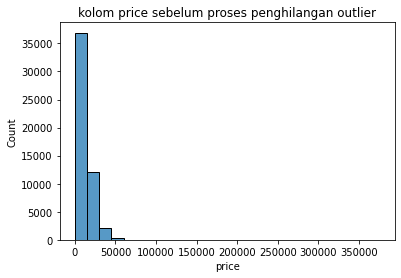

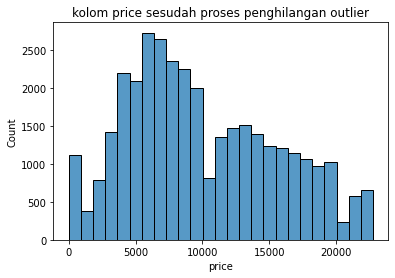

In [64]:
# menampilkan histogram data kolom 'price' sebelum proses penghilangan outlier
sns.histplot(data=df, x='price', bins=25)
plt.title('kolom price sebelum proses penghilangan outlier')
plt.show()

# menampilkan histogram data kolom 'price' sesudah proses penghilangan outlier
sns.histplot(data=clean_data, x='price', bins=25)
plt.title('kolom price sesudah proses penghilangan outlier')
plt.show()

Pada histogram data kolom `price` sebelum proses pembersihan outlier, data lebih berpusat ke nilai yang antara 0 sampai 50000 (4 bins pertama). Namun pada histogram data sesudah proses pembersihan outlier, data cenderung tersebar merata ke tiap bins

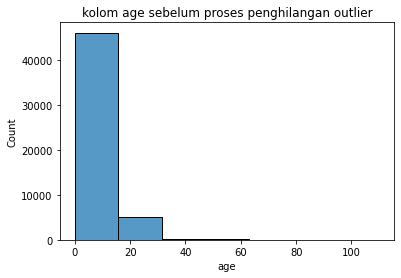

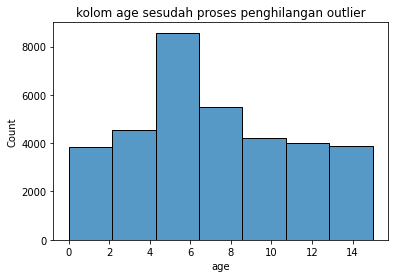

In [65]:
# menampilkan histogram data kolom 'age' sebelum proses penghilangan outlier
sns.histplot(data=df, x='age', bins=7)
plt.title('kolom age sebelum proses penghilangan outlier')
plt.show()

# menampilkan histogram data kolom 'age' sesudah proses penghilangan outlier
plt.title('kolom age sesudah proses penghilangan outlier')
sns.histplot(data=clean_data, x='age', bins=7)
plt.show()

Pada histogram data kolom `age` sebelum proses pembersihan outlier, data lebih berpusat ke nilai yang antara 0 sampai 60 (4 bins pertama). Namun pada histogram data sesudah proses pembersihan outlier, data cenderung tersebar merata ke tiap bins

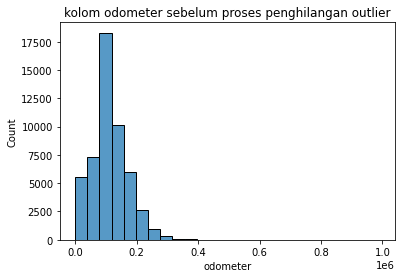

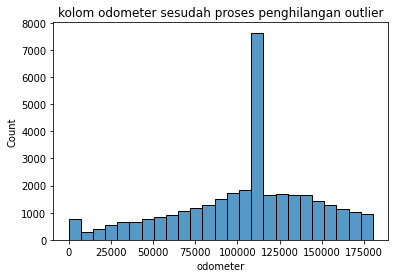

In [66]:
# menampilkan histogram data kolom 'odometer' sebelum proses penghilangan outlier
sns.histplot(data=df, x='odometer', bins=25)
plt.title('kolom odometer sebelum proses penghilangan outlier')
plt.show()

# menampilkan histogram data kolom 'odometer' sesudah proses penghilangan outlier
sns.histplot(data=clean_data, x='odometer', bins=25)
plt.title('kolom odometer sesudah proses penghilangan outlier')
plt.show()

Pada histogram data kolom `odometer` sebelum proses pembersihan outlier, data lebih berpusat ke nilai yang antara 0 sampai 0.4 (10 bins pertama). Namun pada histogram data sesudah proses pembersihan outlier, data cenderung tersebar merata ke tiap bins

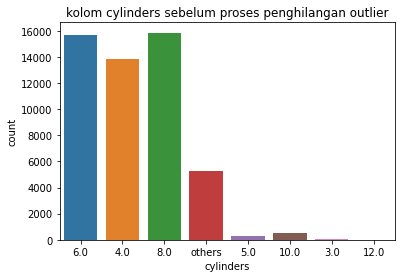

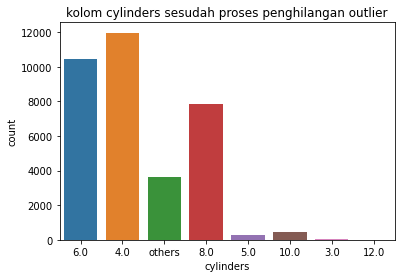

In [67]:
# menampilkan histogram data kolom 'cylinders' sebelum proses penghilangan outlier
sns.countplot(data=df, x='cylinders')
plt.title('kolom cylinders sebelum proses penghilangan outlier')
plt.show()

# menampilkan histogram data kolom 'cylinders' sesudah proses penghilangan outlier
sns.countplot(data=clean_data, x='cylinders')
plt.title('kolom cylinders sesudah proses penghilangan outlier')
plt.show()

Perbedaan bentuk penyebaran data pada bar chart kolom `cylinders` tidak terlalu terlihat signifikan meskipun tetap ada

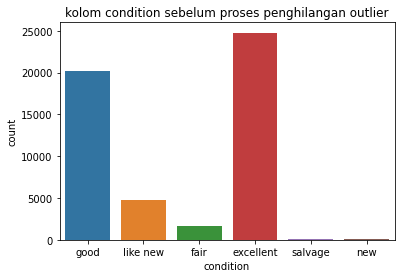

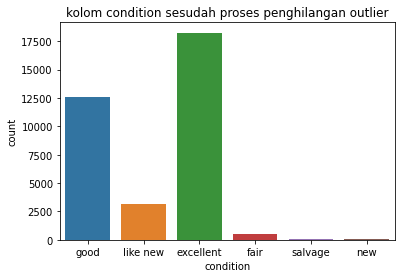

In [68]:
# menampilkan histogram data kolom 'condition' sebelum proses penghilangan outlier
sns.countplot(data=df, x='condition')
plt.title('kolom condition sebelum proses penghilangan outlier')
plt.show()

# menampilkan histogram data kolom 'condition' sesudah proses penghilangan outlier
sns.countplot(data=clean_data, x='condition')
plt.title('kolom condition sesudah proses penghilangan outlier')
plt.show()

Perbedaan bentuk penyebaran data pada bar chart kolom `condition` tidak terlalu terlihat signifikan meskipun tetap ada

Dari beberapa perbandingan di atas ditemukan bahwa pengamatan data setelah proses penghilangan oulier lebih mudah dibandingkan ketika masih ada outlier (terutama pada kolom numerikal), karena outlier mempengaruhi bentuk suatu data (penyebaran nilai)

<div class="alert alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.8 masih ada yang kurang yah yaitu "Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- jadi belum ada perbandingan dengan histogram sebelum dibuang outliernya dan juga conclusions di setiap histogramnya.

</div>

## Masa Berlaku Iklan

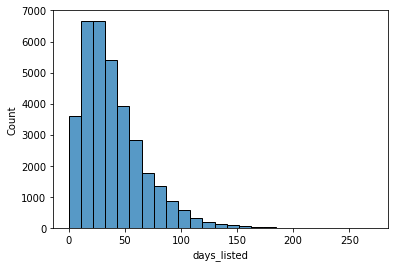

In [69]:
sns.histplot(data=clean_data, x='days_listed', bins=25)
plt.show()

In [70]:
# rata-rata 'days_listed'
round(clean_data['days_listed'].mean())

40

In [71]:
# median 'days_listed'
clean_data['days_listed'].median()

33.0

In [72]:
# menampilkan nilai min dari kolom 'days_listed'
clean_data['days_listed'].min()

0

In [73]:
# menampilkan nilai max dari kolom 'days_listed'
clean_data['days_listed'].max()

271

Dilihat dari mean pada kolom `days_listed`, lama umumnya sebuah iklan ditayangkan adalah 40 hari (nilai dibulatkan). Durasi iklan tercepat adalah 0 hari, dan durasi terlamanya adalah 271 hari.

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.9 sudah oke yah!

</div>

## Harga Rata-Rata Setiap Jenis Kendaraan

In [74]:
# membuat pivot table untuk rata-rata harga dan jumlah iklan
type_data = pd.pivot_table(data=clean_data, index='type', values='price', aggfunc=['mean', 'count']).reset_index()
type_data

,type,mean,count
,,price,price
0,SUV,10043.603943,8928
1,bus,7700.000000,2
2,convertible,11889.420513,195
3,coupe,11029.546521,1279
4,hatchback,7091.574136,897
5,mini-van,8449.590129,932
6,offroad,13691.265957,94
7,other,9345.295082,183
8,pickup,13096.230976,3351


In [75]:
# mengganti nama kolom pada pivot table
type_data.columns= ['type', 'mean_price', 'count']
type_data

,type,mean_price,count
0,SUV,10043.603943,8928
1,bus,7700.000000,2
2,convertible,11889.420513,195
3,coupe,11029.546521,1279
4,hatchback,7091.574136,897
5,mini-van,8449.590129,932
6,offroad,13691.265957,94
7,other,9345.295082,183
8,pickup,13096.230976,3351
9,sedan,7366.841788,10625


In [76]:
# mengurutkan pivot table berdasarkan jumlahnya
type_data = type_data.sort_values(by='count', ascending=False).reset_index(drop=True)
type_data

,type,mean_price,count
0,sedan,7366.841788,10625
1,SUV,10043.603943,8928
2,truck,13068.159119,6404
3,pickup,13096.230976,3351
4,coupe,11029.546521,1279
5,wagon,9480.921963,1243
6,mini-van,8449.590129,932
7,hatchback,7091.574136,897
8,van,8894.431072,457
9,convertible,11889.420513,195


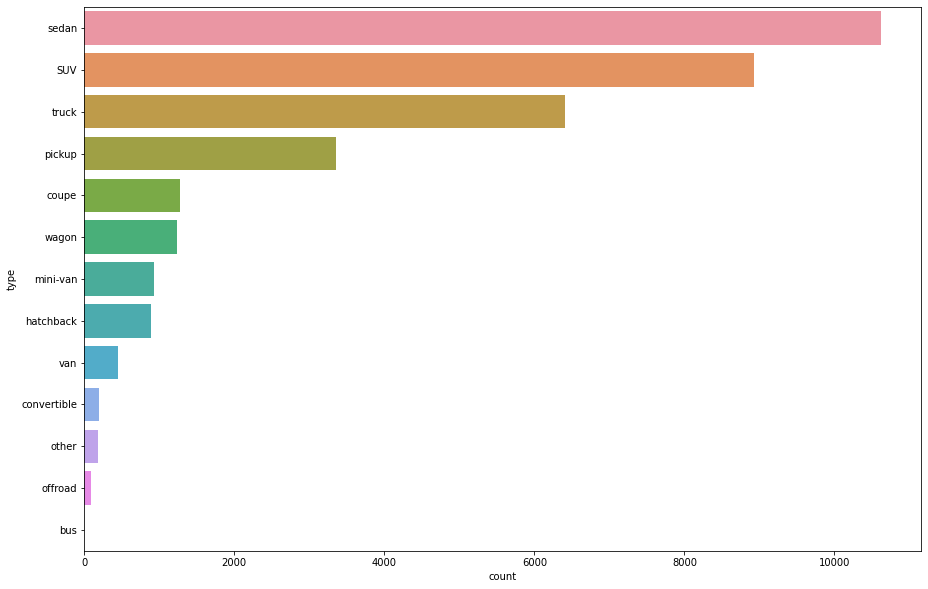

In [77]:
# mevisualisasikan jumlah iklan di tiap jenis kendaraan 
plt.figure(figsize=(15,10))
sns.barplot(data=type_data, y='type', x='count')
plt.show()

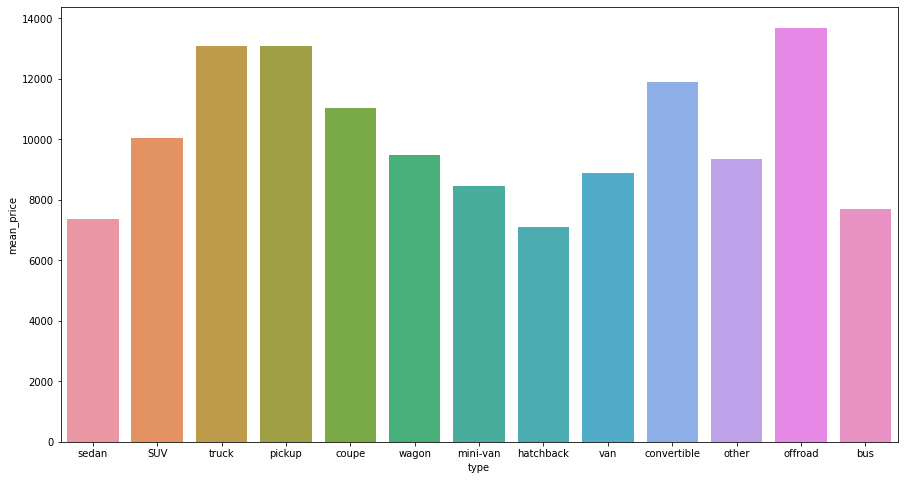

In [78]:
# mevisualisasikan hubungan antara jumlah iklan tiap jenis kendaraan dengan rata-rata harga kendaraan 
plt.figure(figsize=(15,8))
sns.barplot(data=type_data, x='type', y='mean_price')
plt.show()

In [79]:
# menghitung korelasinya
type_data['count'].corr(type_data['mean_price'])

-0.03948137576253975

In [80]:
# menyimopan data dengan 2 jenis terbanyak 
most_type = clean_data.query('type == "sedan" or type == "SUV"')
most_type

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer,condition_number
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19,2018-07-12,25,6,2018,7.0,20714.285714,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019-04-27,6,2,2019,6.0,18333.333333,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019-04-30,14,4,2019,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018-07-05,25,6,2018,4.0,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2019-03-10,52,12,2018,3.0,26404.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,2018-10-12,32,8,2018,13.0,8476.923077,3
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018-11-09,40,10,2018,5.0,17627.200000,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018-12-17,46,11,2018,9.0,14222.222222,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018-09-11,27,7,2018,5.0,27914.600000,2


Dari grafik dan perhitungan korelasi diatas dapat disimpulkan bahwa hubungan antara jumlah iklan dengan harga rata-rata jenis kendaraan adalah medium negatif, yaitu jika harga rata-rata jenis kendaraan makin tinggi maka jumlah ikan semakin sedikit dan begitupula sebaliknya. 

2 jenis kendaraan dengan jumlah iklan terbanyak adalah sedan dan SUV dengan harga menengah ke bawah (harga cenderung rendah).

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.10 sudah sesuai yah!

</div>

## Faktor Harga

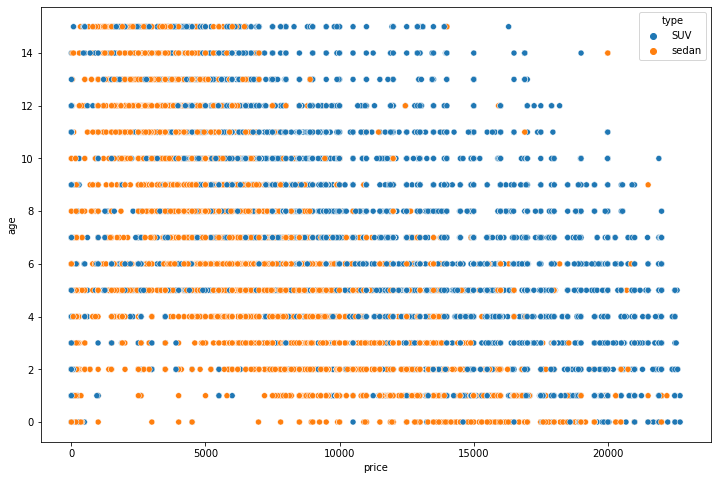

In [81]:
# memvisualisasikan hubungan antara harga 2 jenis terbanyak dengan usia 
plt.figure(figsize=(12,8))
sns.scatterplot(data=most_type, x='price', y='age', hue='type')
plt.show()

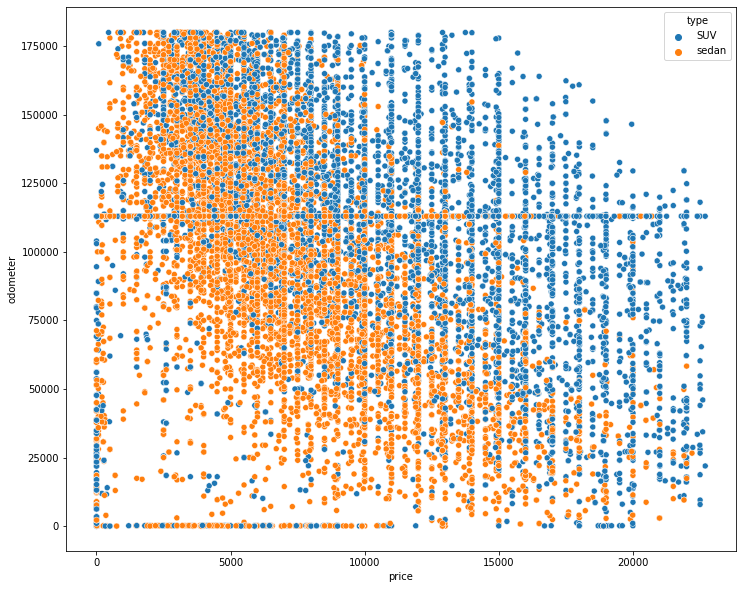

In [82]:
# memvisualisasikan hubungan antara harga 2 jenis terbanyak jarak tempuh
plt.figure(figsize=(12,10))
sns.scatterplot(data=most_type, x='price', y='odometer', hue='type')
plt.show()

In [83]:
# melihat jumlah iklan per nilai di kolom 'transmission'
most_type['transmission'].value_counts()

automatic    18530
manual         753
other          270
Name: transmission, dtype: int64

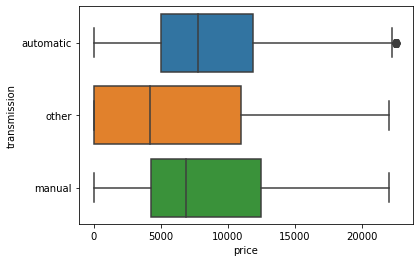

In [84]:
# memvisualisasikan hubungan antara harga 2 jenis terbanyak dengan kolom 'transmission'
sns.boxplot(data=most_type, x='price', y='transmission')
plt.show()

In [85]:
# melihat jumlah iklan per nilai di kolom 'condition'
most_type['condition_number'].value_counts()

3    10719
2     6449
4     2045
1      251
5       52
0       37
Name: condition_number, dtype: int64

In [86]:
# mengambil nilai yang jumlahnya lebih dari 50 
condition = most_type.loc[most_type['condition_number'] > 0].sort_values(by='condition_number')
condition

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer,condition_number
21261,1900,2013.0,chevrolet tahoe,fair,8.0,gas,113000.0,automatic,SUV,white,1.0,2019-01-04,24,2019-01-28,1,1,2019,6.0,1.883333e+04,1
12478,2800,2009.0,subaru forester,fair,4.0,gas,141966.0,automatic,SUV,grey,1.0,2019-03-08,9,2019-03-17,10,3,2019,10.0,1.419660e+04,1
18342,1600,2013.0,chevrolet impala,fair,4.0,gas,150000.0,automatic,sedan,silver,0.0,2019-03-10,19,2019-03-29,10,3,2019,6.0,2.500000e+04,1
47582,1800,2007.0,toyota corolla,fair,4.0,gas,113000.0,automatic,sedan,red,0.0,2018-10-12,78,2018-12-29,41,10,2018,11.0,1.027273e+04,1
34121,1300,2013.0,volkswagen passat,fair,6.0,gas,113000.0,automatic,sedan,blue,0.0,2018-06-30,22,2018-07-22,26,6,2018,5.0,2.260000e+04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,250,2019.0,toyota camry,new,4.0,gas,100.0,automatic,sedan,black,0.0,2019-03-02,63,2019-05-04,9,3,2019,0.0,inf,5
13520,12995,2016.0,nissan altima,new,4.0,gas,75356.0,automatic,sedan,red,0.0,2018-05-30,8,2018-06-07,22,5,2018,2.0,3.767800e+04,5
47905,13900,2013.0,jeep wrangler,new,others,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35,2019-05-15,15,4,2019,6.0,2.483333e+04,5
10444,9600,2013.0,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33,2018-09-01,31,7,2018,5.0,3.800000e+03,5


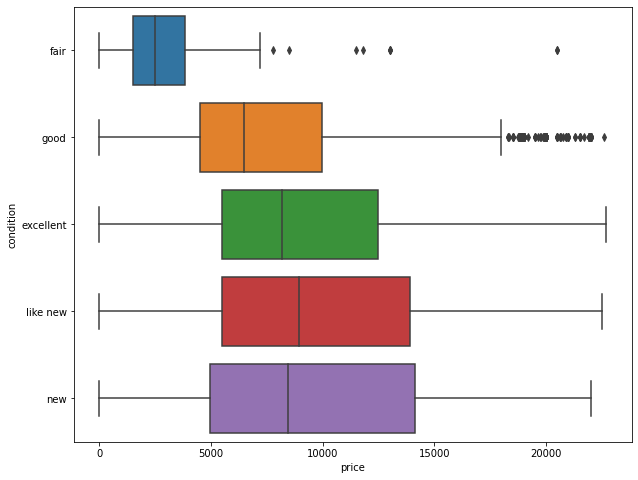

In [87]:
# memvisualisasikan hubungan antara harga 2 jenis terbanyak dengan kolom 'condition' 
plt.figure(figsize=(10,8))
sns.boxplot(data=condition, x='price', y='condition')
plt.show()

In [88]:
# melihat jumlah iklan per nilai di kolom 'paint_color'
most_type['paint_color'].value_counts()

others    3525
black     3241
silver    2966
white     2734
grey      2334
blue      1812
red       1443
custom     485
brown      462
green      396
orange      77
purple      44
yellow      34
Name: paint_color, dtype: int64

In [89]:
# memilah nilai yang jumlahnya lebih dari 50 
excluded = ['purple', 'yellow']

color = most_type.loc[~most_type['paint_color'].isin(excluded)]
color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_last_posted,weeks_posted,months_posted,years_posted,age,average_odometer,condition_number
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19,2018-07-12,25,6,2018,7.0,20714.285714,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019-04-27,6,2,2019,6.0,18333.333333,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019-04-30,14,4,2019,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018-07-05,25,6,2018,4.0,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2019-03-10,52,12,2018,3.0,26404.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,2018-10-12,32,8,2018,13.0,8476.923077,3
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018-11-09,40,10,2018,5.0,17627.200000,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018-12-17,46,11,2018,9.0,14222.222222,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018-09-11,27,7,2018,5.0,27914.600000,2


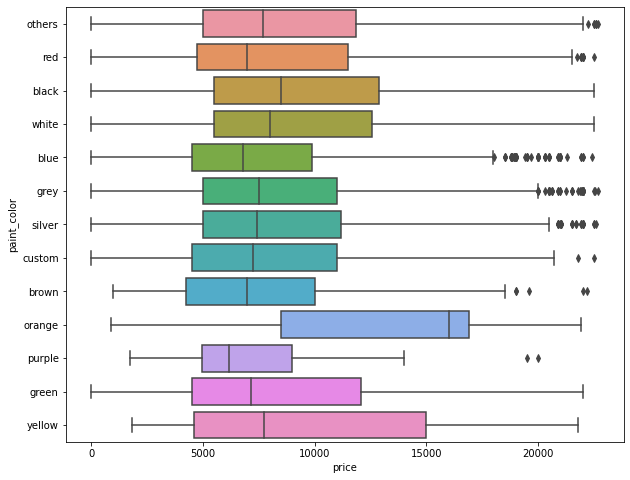

In [90]:
# memvisualisasikan hubungan antara harga 2 jenis terbanyak dengan kolom 'paint_color'
plt.figure(figsize=(10,8))
sns.boxplot(data=most_type, x='price', y='paint_color')
plt.show()

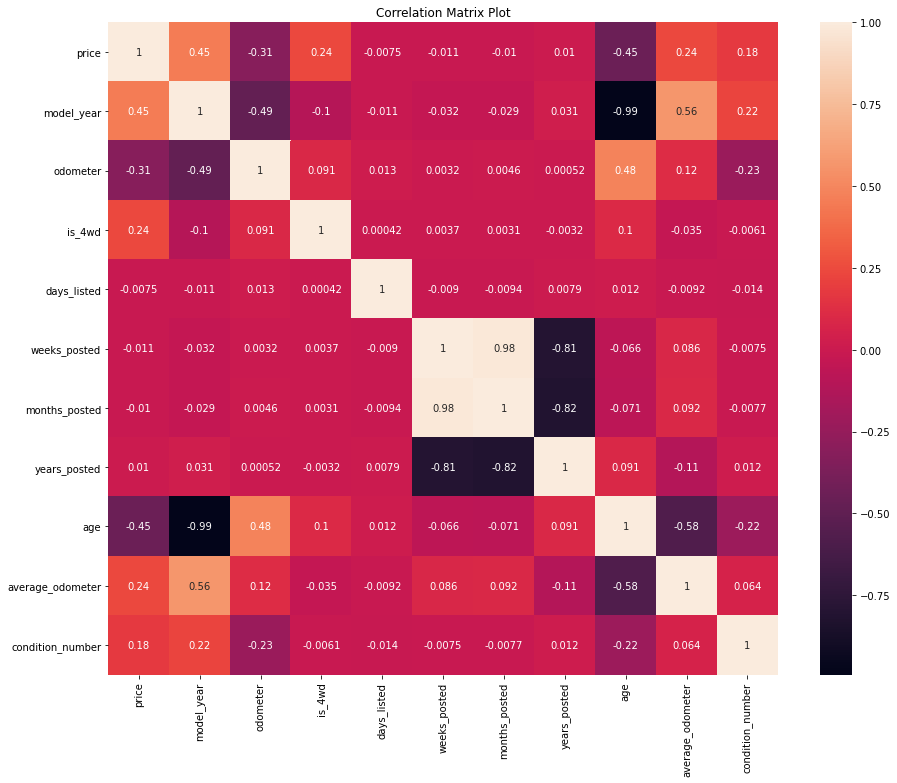

In [91]:
# memvisualisasikan hasil perhitungan kolrelasi pada kolom numerik
plt.figure(figsize=(15, 12))
sns.heatmap(most_type.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

Hubungan antara harga dengan parameter inti: 
- **usia** - semakin tua usia kendaraan ketika iklan ditayangkan, maka semakin murah harga jualnya.
- **jarak tempuh** - semakin besar jarak tempuh kendaraan, maka semakin murah harga jualnya.
- **kondisi** - semakin bagus kondisi barang, semakin mahal harga jualnya
- **tipe transmisi** - urutan tipe transmisi berdasarkan harga tertinggi adalah `automatic`, `manual`, kemudian `other`
- **warnanya** - tidak ada korelasi antara harga dan warna, namun warna oranye merupakan warna dengan harga tertinggi.

Berdasarkan matriks korelasi, faktor yang paling memengaruhi harga kendaraan adalah usia kendaraan ketika iklan ditayangka (`age`). Pada kolom `age` korelasinya adalah -0.45 (medium negatif)

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- Section 2.11 sudah sesuai yah! Sudah bisa mengetahui faktor yang paling mempengaruhi harga dari kendaraan.

</div>

## Kesimpulan Umum

**Cara Memproses dan Menganalisis Data.** 

**Langkah 1 : pra-pemrosesan data** . 
1. membuka file dan mempelajari informasi umumnya
2. melakukan pemeriksan sekaligus mempelajari nilai-nilai yang hilang pada data

Setelah mengamati data, ditemukan adanya ketidak normalan pada data berupa adanya nilai yang hilang dan tipe data yang tidak sesuai dengan makna dari nilainya. Bahkan salah satu kolom (`is_4wd`) memiliki persentase missing value yang melebihi 50% data. Untuk kelancaran proses pengolahan data, perlu dilakukan perbaikan pada data yaitu:
1. dilakukan pengisian pada kolom dengan nilai yang hilang.
    - Pada deskripsi data, kolom `is_4wd` bertipe datakan boolean. Dilihat dari unique dari kolom tersebut, kemungkinan besar data yang hilang pada terjadi karena kesalahan sistem saat memasukkan nilai `0` (nilai tidak pada boolean). Maka dari itu, nilai yang hilang di kolom `is_4wd` diisi dengan nilai `0`
    - untuk kolom lain yang persentase missing valuenya rendah, missing value dapat diganti dengan modus (bila tipe data kategorik) atau median (bila tipe data nominal). Digunakannya median adalah untuk mengantisipasi ketidak merataan penyebaran data akibat adanya outlier
2. dilakukan (penyesuaian) penggantian tipe data
    - mengubah tipe data di kolom `date_posted` yang awalnya string menjadi datetime
3. Perbaikan kualitas data
    - dilakukan penambahan beberapa kolom pada data untuk mempermudah proses analisis
4. Melakukan pengecekan terhadap perubahan yang telah dilakukan

Hasil dari proses pra-pemrosesan data adalah data yang bersih dari missing value dan telah berisi kolom yang dibutuhkan.

**Langkah 2 : Analisis ekploratif**
1. Pelajari parameter inti yang berisikan
    - Harga (`price`)
    - Usia kendaraan ketika iklan ditayangkan (`age)
    - Jarak tempuh (`odometer`)
    - Jumlah silinder (`cylinders`)
    - Kondisi (`condition`)

   Proses ini dilakukan denagan cara memvisualisasikan data dengan histogram untuk data nominal dan boxplot untuk data kategorikal. Pada tahap ini, ditemukan bahwa terdapat outlier pada beberapa kolom parameter inti. 


2. Menghilangkan data outlier

    Hal ini dilakukan dengan cara menentukan nilai normal (whisker atas dan bawah) kemudian ambil data yang ada berada dalam lingkup nilai normal.


3. Mempelajari parameter inti yang telah bersih dari outlier

   Proses ini dilakukan dengan cara memvisualisasikan data dengan histogram dan bar chart. Hal ini dilakukan untuk mengecek berhasil atau tidaknya proses penghilangan outlier.
   
   
4. Mempelajari masa berlaku iklan

   Proses ini dilakukan untuk mengetahui lama umumnya sebuah iklan ditayangkan, durasi iklan tercepat, dan durasi terlamanya.
   
   
5. Mempelajari harga rata-rata setiap jenis kendaraan

   Proses ini dilakukan dengan cara membuat pivot table yang menghubungkan antara rata-rata harga untuk tiap jenis kendaraan dengan jumlah jenis kendaraan. Setelah itu buat visualisasi dari pivot table tersebut dengan bar chart. Ambil data berdasarkan 2 jenis kendaraan terpopuler untuk digunakan pada proses selanjutnya. 
   
   
6. Mempelajari faktor harga

   Data yang digunakan adalah berdasarkan 2 jenis kendaraan terpopuler yang telah ditemukan pada tahap sebelumnya.
    - pada kolom nominal, visualisasikan hubungan antara harga 2 jenis terbanyak dengan parameter inti lain yang bertipe nominal
    - pada kolom kategorikal, cek apakah jumlah nilai lebih dari 49. Gunakan data yang terdiri dari setidaknya 50 iklan. Hal ini ditujukan agar parameternya valid untuk digunakan saat analisis. Visualisasikan hubungan antara harga 2 jenis terbanyak dengan parameter inti lain yang bertipe kategorikal
    - Gunakan matriks korelasi untuk mendukung pengambilan kesimpulan


**Nilai yang Hilang**

Terdatap missing values di beberapa kolom, yaitu:
- `model_year` sejumlah 3619 (7.02%)
- `cylinders` sejumlah 5260 (10,21%)
- `odometer` sejumlah 7892 (15,32%)
- `paint_color` sejumlah 9267 (17,99%)
- `is_4wd` sejumlah 25953 (50,37%)

Pada kolom `is_4wd`, persentase missing value bahkan melebihi setengah dari jumlah data.

**Duplikat** 

Tidak terdapat nilai duplikat pada data ini

**Outlier** 

Terdapat outlier pada parameter inti berikut:
- harga
- usia kendaraan ketika iklan ditayangkan
- jarak tempuh

**Hasil Analisis**

- Lama umumnya sebuah iklan ditayangkan adalah 40 hari (nilai dibulatkan). Durasi iklan tercepat adalah 0 hari, dan durasi terlamanya adalah 271 hari.
- Hubungan antara jumlah iklan dengan harga rata-rata jenis kendaraan adalah medium negatif, yaitu jika harga rata-rata jenis kendaraan makin tinggi maka jumlah ikan semakin sedikit dan begitupula sebaliknya
- Berdasarkan matriks korelasi, faktor yang paling memengaruhi harga kendaraan adalah usia kendaraan ketika iklan ditayangka (`age`). Pada kolom `age` korelasinya adalah -0.45 (medium negatif)

Hubungan antara harga dengan parameter inti: 
- **usia** - semakin tua usia kendaraan ketika iklan ditayangkan, maka semakin murah harga jualnya.
- **jarak tempuh** - semakin besar jarak tempuh kendaraan, maka semakin murah harga jualnya.
- **kondisi** - semakin bagus kondisi barang, semakin mahal harga jualnya
- **tipe transmisi** - urutan tipe transmisi berdasarkan harga tertinggi adalah `automatic`, `manual`, kemudian `other`
- **warnanya** - tidak ada korelasi antara harga dan warna, namun warna oranye merupakan warna dengan harga tertinggi.

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Nadia! Sebagian besar kamu telah menyelesaikan project ini dengan baik dan sudah memahami terkait Basic EDA menggunakan Python dengan baik. Namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah (Section 2.4 dan Section 2.8). Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!.
    
Keep going Nadia, you are doing very well!
    

</div>

<div class="alert alert-block alert-success">

# General comments #2
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Nadia! Kamu sudah melakukan revisi dan bisa melanjutkan ke tahap selanjutnya!
    
Keep going Nadia, you are doing very well!
    

</div>